In [1]:
from droplet_growth import multiwell
import numpy as np
import pims_nd2 as nd
from tqdm.auto import tqdm
from scipy.ndimage import gaussian_filter, binary_erosion, binary_fill_holes, label
from skimage.measure import regionprops, regionprops_table
%load_ext autoreload
%autoreload 2

In [2]:
from nd2shrink import transform
from tifffile import imread
import seaborn as sns
import pandas as pd
import os

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sys
sys.version

'3.8.1 (default, Jan  8 2020, 15:55:49) [MSC v.1916 64 bit (AMD64)]'

In [5]:
def show(bf, cmap='gray', **kwargs):
    plt.figure(figsize=(15,10))
    plt.imshow(bf, cmap=cmap, **kwargs)

In [6]:
test_path = '/Users/andrey/Documents/data-SGR/20200227_4ngml_2x10-3_Elissa.nd2'

In [7]:
test_path = r"Z:\Andrey\data\Salome\20200226_4ngml_2x10-3_Merlin.nd2"

In [8]:
prefix_win = "Z:/"
prefix_mac = '/Volumes/Multicell/'

In [15]:
control_bf_path = os.path.join(prefix_win, '/Andrey/data/Salome/Time_lapse_control_E.coli_20x/FIJI-export/scale0.1/Time_lapse_control_E.coli_20x_C1_Z1_scale0.1.tif')
control_RFP_path = os.path.join(prefix_win, '/Andrey/data/Salome/Time_lapse_control_E.coli_20x/FIJI-export/scale0.1/Time_lapse_control_E.coli_20x_C2_Z1_scale0.1.tif')
control_GFP_path = os.path.join(prefix_win, '/Andrey/data/Salome/Time_lapse_control_E.coli_20x/FIJI-export/scale0.1/Time_lapse_control_E.coli_20x_C3_Z1_scale0.1.tif')


In [16]:
os.path.exists(control_bf_path)

True

In [11]:
control_bf_path = '/Volumes/Multicell/Andrey/data/Salome/Time_lapse_control_E.coli_20x/FIJI-export/scale0.1/Time_lapse_control_E.coli_20x_C1_Z1_scale0.1.tif'
control_RFP_path = '/Volumes/Multicell/Andrey/data/Salome/Time_lapse_control_E.coli_20x/FIJI-export/scale0.1/Time_lapse_control_E.coli_20x_C2_Z1_scale0.1.tif'
control_GFP_path = '/Volumes/Multicell/Andrey/data/Salome/Time_lapse_control_E.coli_20x/FIJI-export/scale0.1/Time_lapse_control_E.coli_20x_C3_Z1_scale0.1.tif'
# control_path = '/Users/andrey/Documents/data-SGR/Time_lapse_control_E.coli_20x_downscale_16x.tif'

In [12]:
bf_path = '/Volumes/Multicell/Andrey/data/Salome/20200303_4ngml_2x10-3/FIJI-export/scale0.1/20200303_4ngml_2x10_C3_Z1_scale0.1.tif'
RFP_path = '/Volumes/Multicell/Andrey/data/Salome/20200303_4ngml_2x10-3/FIJI-export/scale0.1/20200303_4ngml_2x10_C1_Z1_scale0.1.tif'
GFP_path = '/Volumes/Multicell/Andrey/data/Salome/20200303_4ngml_2x10-3/FIJI-export/scale0.1/20200303_4ngml_2x10_C2_Z1_scale0.1.tif' 
# control_path = '/Users/andrey/Documents/data-SGR/Time_lapse_control_E.coli_20x_downscale_16x.tif'

In [17]:
bf_path = os.path.join(prefix_win, '/Andrey/data/Salome/20200303_4ngml_2x10-3/FIJI-export/scale0.1/20200303_4ngml_2x10_C3_Z1_scale0.1.tif')
RFP_path = os.path.join(prefix_win, '/Andrey/data/Salome/20200303_4ngml_2x10-3/FIJI-export/scale0.1/20200303_4ngml_2x10_C1_Z1_scale0.1.tif')
GFP_path = os.path.join(prefix_win, '/Andrey/data/Salome/20200303_4ngml_2x10-3/FIJI-export/scale0.1/20200303_4ngml_2x10_C2_Z1_scale0.1.tif') 
# control_path = '/Users/andrey/Documents/data-SGR/Time_lapse_control_E.coli_20x_downscale_16x.tif'

In [18]:
control_bf_stack = imread(control_bf_path)
control_RFP_stack = imread(control_RFP_path)
control_GFP_stack = imread(control_GFP_path)


In [19]:
bf_stack = imread(bf_path)
RFP_stack = imread(RFP_path)
GFP_stack = imread(GFP_path)


In [20]:
control_bf_stack.shape

(13, 870, 2213)

In [21]:
control_RFP_stack.shape

(13, 870, 2213)

259  regions
42  bad regions
217 good regions


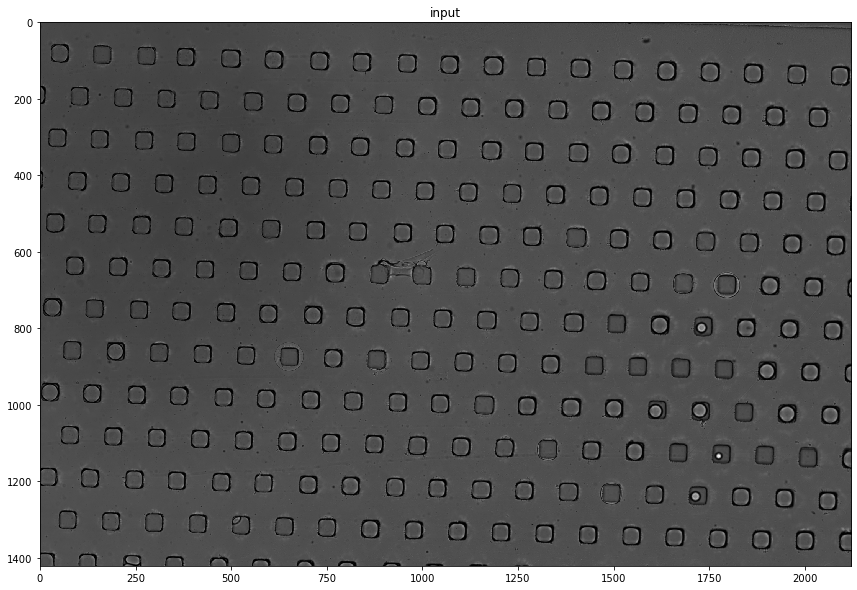

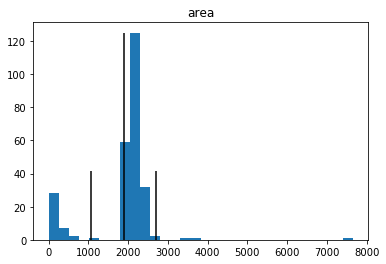

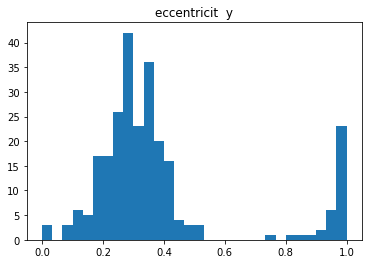

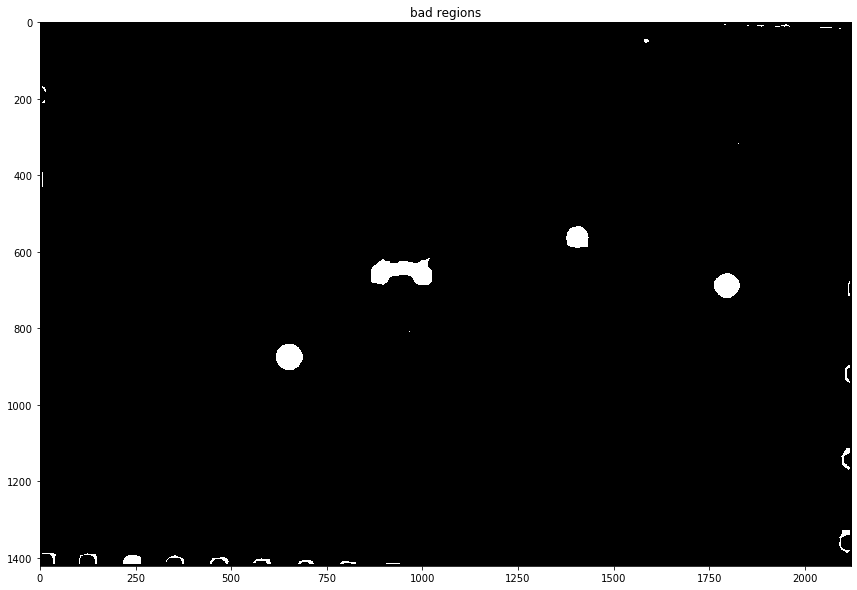

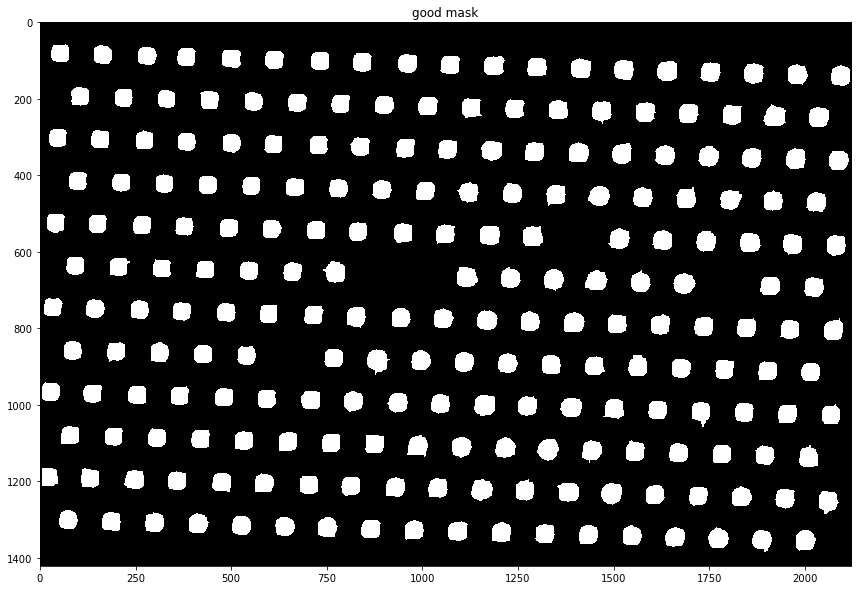

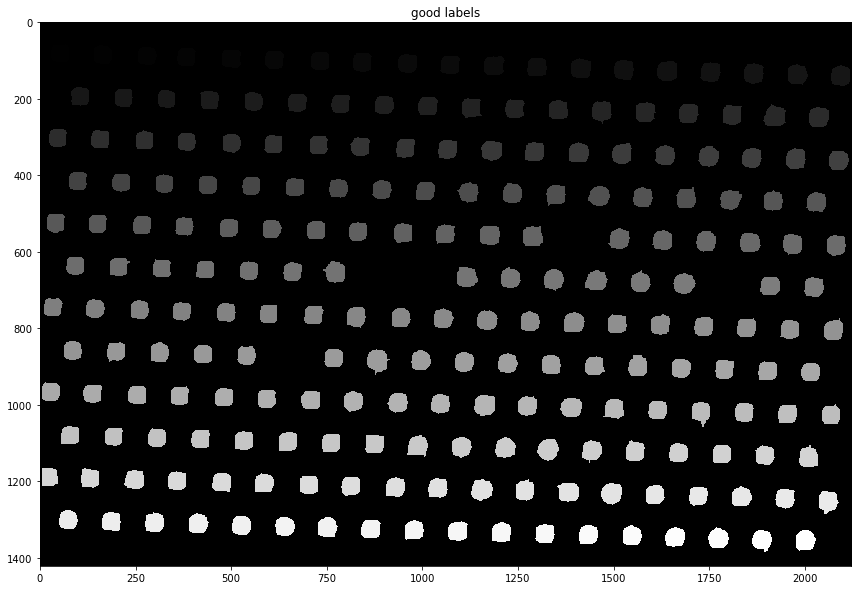

In [22]:
mask = multiwell.get_mask(bf_stack, erode=10)

455  regions
26  bad regions
429 good regions


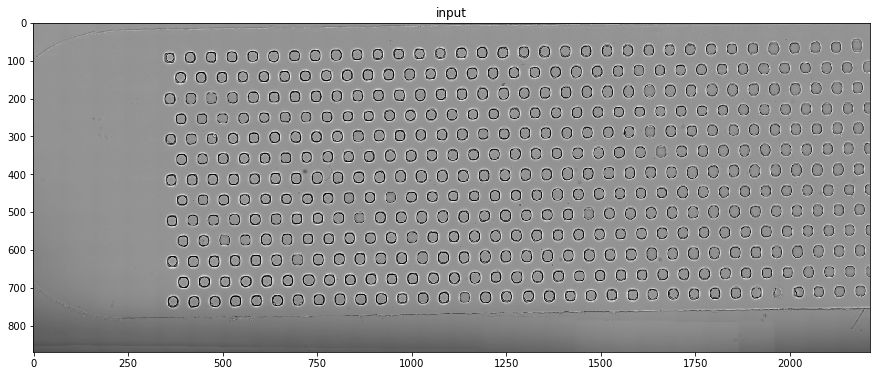

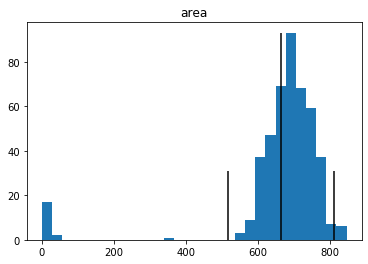

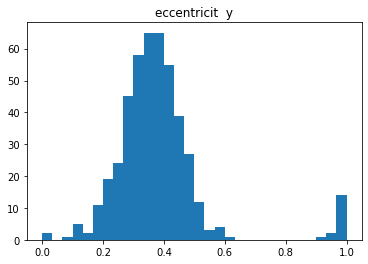

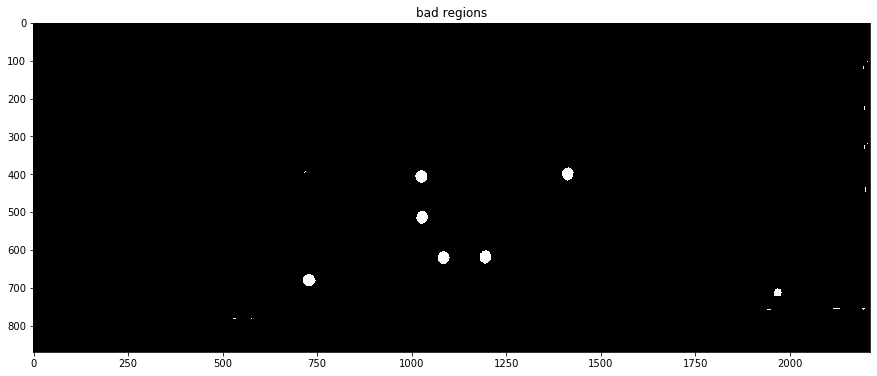

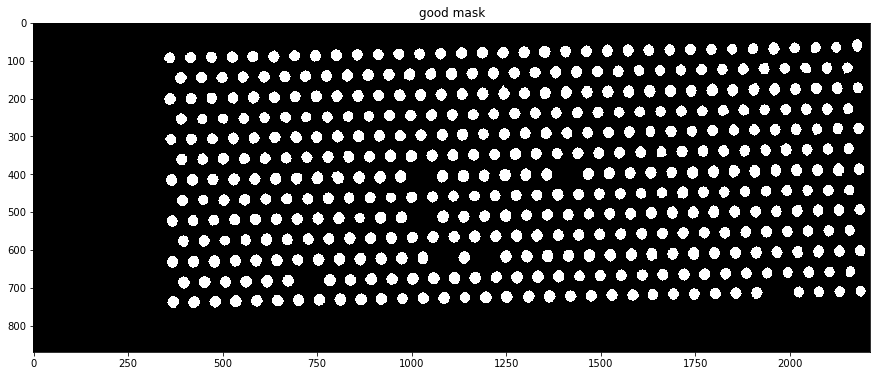

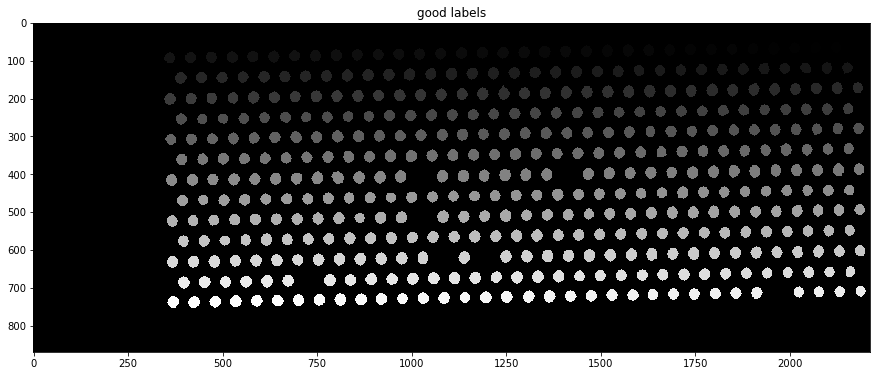

In [24]:
mask_control = multiwell.get_mask(control_bf_stack, erode=10)

Text(0.5, 1.0, 'RFP CYPRO 4ngml')

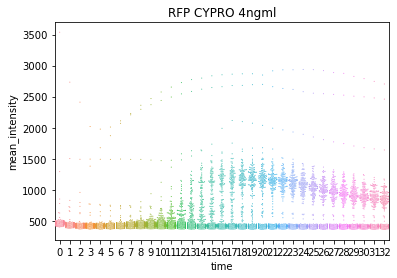

In [25]:
rfp_table = multiwell.get_intensity_table(mask, RFP_stack)
plt.title('RFP CYPRO 4ngml')
# plt.ylim(300, 1700)

Text(0.5, 1.0, 'GFP CYPRO 4ngml')

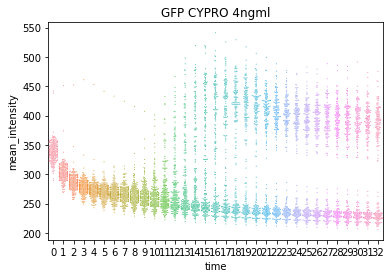

In [32]:
gfp_table = multiwell.get_intensity_table(mask, GFP_stack)
plt.title('GFP CYPRO 4ngml')
# plt.ylim(300, 1700)

Text(0.5, 1.0, 'GFP control')

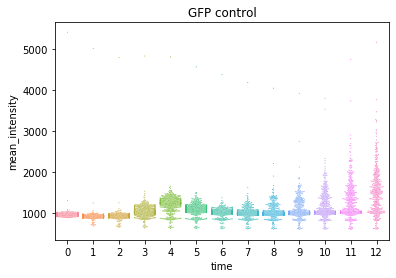

In [35]:
control_gfp_table = multiwell.get_intensity_table(mask_control, control_GFP_stack)
plt.title('GFP control')
# plt.ylim(300, 1700)

Text(0.5, 1.0, 'RFP control')

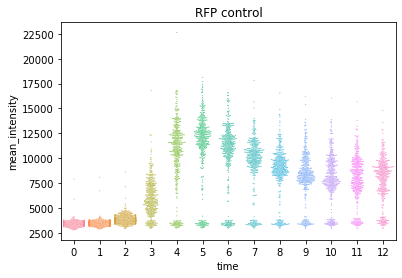

In [36]:
control_rfp_table = multiwell.get_intensity_table(mask_control, control_RFP_stack)
plt.title('RFP control')
# plt.ylim(300, 1700)

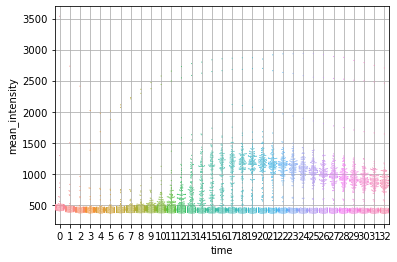

In [26]:
multiwell.plot_intensity_vs_time(rfp_table)
plt.grid()

In [27]:
# f_rfp_table = multiwell.filter_table_by_min_intensity(rfp_table, 'mean_intensity', 32, 700)
# f_rfp_table = multiwell.filter_table_by_max_intensity(f_rfp_table, 'mean_intensity', 32, 1200)

C:\Users\aaristov\Documents\data-compression\nd2shrink\droplet_growth\multiwell.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return table[table[table.time == time].loc[:, column] > min_intensity]
C:\Users\aaristov\Documents\data-compression\nd2shrink\droplet_growth\multiwell.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return table[table[table.time == time].loc[:, column] < max_intensity]


In [383]:
# def fuse_tables(tables:tuple, titles:tuple, same_columns=['time', 'label'], stack_columns='mean_intensity'):
#     for col in same_columns:
#         assert [all(tables[0].loc[:, col] == another_table.loc[:, col]) for another_table in tables[1:]]
# #     new_df = pd.DataFrame(columns=[*same_columns, *[f'{title}_{stack_columns}']])
#     df = pd.DataFrame.from_dict({
#         'time': tables[0].time.values,
#         'label': tables[0].label.values,
#         **{f'{title}_{stack_columns}': table.loc[:, stack_columns].values for title,table in zip(titles, tables)}
#     })
#     print(f'New table with columns {df.columns.values}')
#     return df

In [384]:
# gfp_rfp_table = fuse_tables((gfp_table, rfp_table), ('GFP', 'RFP'))

New table with columns ['time' 'label' 'GFP_mean_intensity' 'RFP_mean_intensity']


In [33]:
p_gfp_table = gfp_table.pivot(index='label', columns='time', values='mean_intensity')
p_rfp_table = rfp_table.pivot(index='label', columns='time', values='mean_intensity')


In [37]:
p_gfp_control = control_gfp_table.pivot(index='label', columns='time', values='mean_intensity')
p_rfp_control = control_rfp_table.pivot(index='label', columns='time', values='mean_intensity')


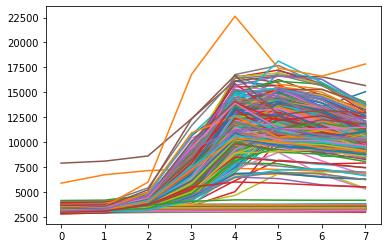

In [498]:
_ = plt.plot(p_rfp_control.T)

In [38]:
filt = np.logical_and(p_rfp_table.values[:, 32] > 700, p_rfp_table.values[:, 32] < 1500)

In [39]:
filt_control = np.logical_and(p_rfp_control.values[:, 7] > 5000, p_gfp_control.values[:, 7] < 3000)

In [40]:
filt.shape

(217,)

In [41]:
fp_gfp_table = p_gfp_table.loc[filt]
fp_rfp_table = p_rfp_table.loc[filt]


In [42]:
fp_gfp_control = p_gfp_control.loc[filt_control]
fp_rfp_control = p_rfp_control.loc[filt_control]


Text(0.5, 0, 'time')

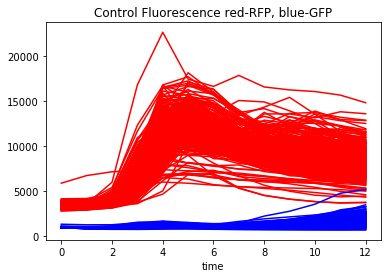

In [43]:
_ = plt.plot(fp_rfp_control.T, 'r-')

_ = plt.plot(fp_gfp_control.T, 'b-')
plt.title('Control Fluorescence red-RFP, blue-GFP')
plt.xlabel('time')

Text(0.5, 0, 'time')

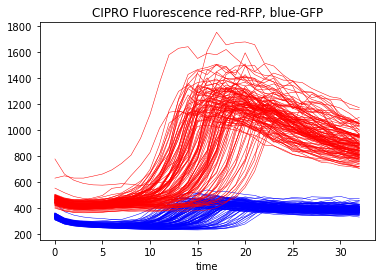

In [44]:
_ = plt.plot(fp_gfp_table.T, 'b-', lw=0.5)
_ = plt.plot(fp_rfp_table.T, 'r-', lw=0.5)
plt.title('CIPRO Fluorescence red-RFP, blue-GFP')
plt.xlabel('time')

In [45]:
def shape_curve(a):
    a_min, a_max = (a.argmin(),  np.gradient(a).argmax())
    aa = a - a.min()
    aa[:a_min] = 0
    aa[a_max:] = 0
    return aa

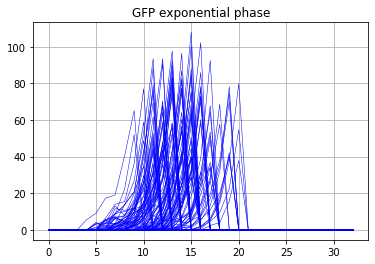

In [46]:
GFP_exp_phase = np.apply_along_axis(shape_curve, 1, fp_gfp_table)
_ = plt.plot(GFP_exp_phase.T, 'b-', lw=0.5)
plt.title('GFP exponential phase')
plt.grid()

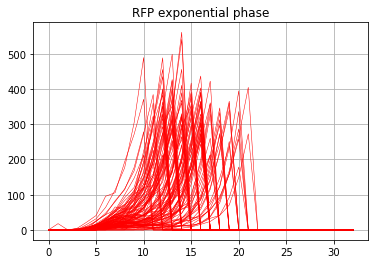

In [47]:
RFP_exp_phase = np.apply_along_axis(shape_curve, 1, fp_rfp_table)
_ = plt.plot(RFP_exp_phase.T, 'r-', lw=0.5)
plt.title('RFP exponential phase')
plt.grid()

In [48]:
def exponent(x, a, c, d):
    return a * np.exp((x - d) / c)


def fit_exponent(hist, bins, fun=exponent, p0=(100, 10, 0)):
    from scipy.optimize import curve_fit

    popt, _ = curve_fit(fun, bins, hist, p0)
    fit_result = fun(bins, *popt)
    return fit_result, popt

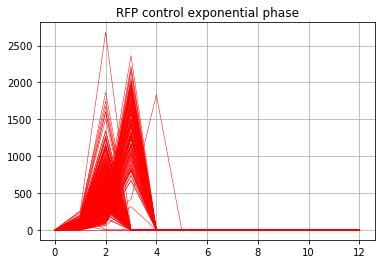

In [49]:
RFP_control_exp_phase = np.apply_along_axis(shape_curve, 1, fp_rfp_control)
_ = plt.plot(RFP_control_exp_phase.T, 'r-', lw=0.5)
plt.title('RFP control exponential phase')
plt.grid()

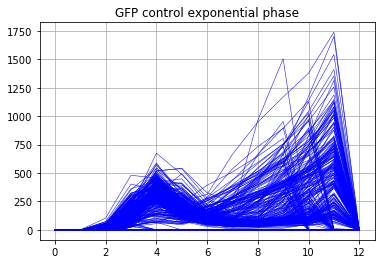

In [50]:
GFP_control_exp_phase = np.apply_along_axis(shape_curve, 1, fp_gfp_control)
_ = plt.plot(GFP_control_exp_phase.T, 'b-', lw=0.5)
plt.title('GFP control exponential phase')
plt.grid()

In [51]:

def correlate_exp_phases(gfp_table, rfp_table):
    corr = np.zeros_like(gfp_table)
    for i, (a, b) in enumerate(zip(gfp_table, rfp_table)):
#         corr[i] = np.correlate(shape_curve(a), shape_curve(b), 'same')
        corr[i] = np.correlate(a, b, 'same')
        
    return corr

In [52]:
corr = correlate_exp_phases(GFP_exp_phase, RFP_exp_phase)
corr.shape

(119, 33)

In [53]:
corr_control = correlate_exp_phases(GFP_control_exp_phase, RFP_control_exp_phase)
corr_control.shape

(371, 13)

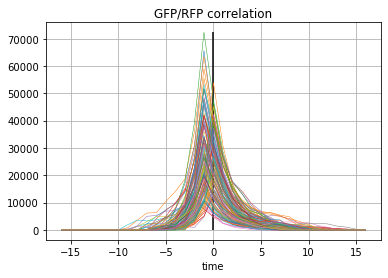

In [54]:
_ = plt.plot(range(-16,17), corr.T, lw=0.5)
plt.vlines(0, 0, np.max(corr))
plt.title('GFP/RFP correlation')
plt.xlabel('time')
plt.grid()

Text(0.5, 1.0, 'Correlation peak coord')

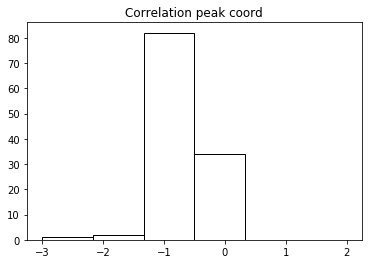

In [55]:
plt.hist(corr.argmax(axis=1) - 16, range=(-3,2), bins=6, fill=None)
plt.title('Correlation peak coord')


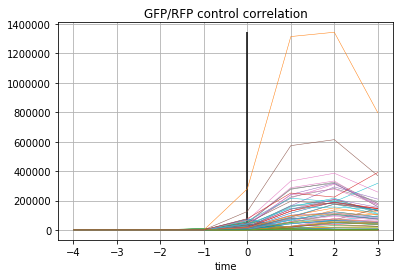

In [524]:
_ = plt.plot(range(-4,4), corr_control.T, lw=0.5)
plt.vlines(0, 0, np.max(corr_control))
plt.title('GFP/RFP control correlation')
plt.xlabel('time')
plt.grid()

In [380]:
f_gfp_rfp_table = multiwell.filter_table_by_max_intensity(gfp_rfp_table, 'RFP_mean_intensity', 32, 1500)

/Users/andrey/Documents/nd2shrink/droplet_growth/multiwell.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return table[table[table.time == time].loc[:, column] < max_intensity]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

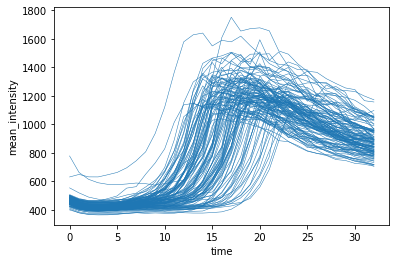

In [360]:
multiwell.plot_intensity_raw_line(f_rfp_table, lw=0.5, )

In [353]:
all(f_rfp_table.loc[:,'mean_intensity'] == f_rfp_table.mean_intensity)

True

Text(0.5, 1.0, 'CIPRO')

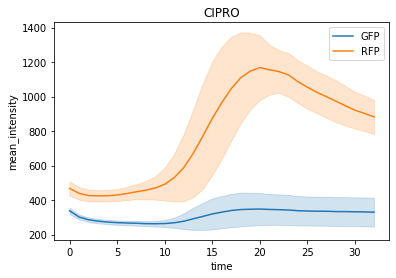

In [527]:
multiwell.plot_intensity_line(f_gfp_table, label='GFP')

multiwell.plot_intensity_line(f_rfp_table, label='RFP')
plt.title('CIPRO')

Text(0.5, 1.0, 'Control')

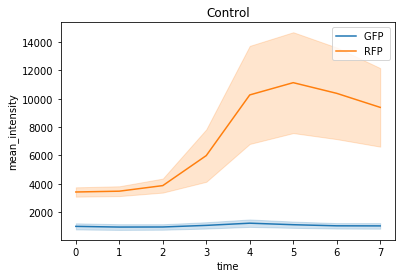

In [340]:
multiwell.plot_intensity_line(control_gfp_table, label='GFP ')
multiwell.plot_intensity_line(control_rfp_table, label='RFP ')
plt.title('Control')

In [341]:
f_gfp_table = gfp_table[[l in f_rfp_table.label for l in gfp_table.label]]

In [342]:
f_gfp_table.label

0        1
1        2
2        3
6        7
7        8
      ... 
208    209
210    211
211    212
212    213
213    214
Name: label, Length: 3927, dtype: object

In [347]:
f_rfp_table.pivot(index='time', columns='label', values='mean_intensity')

label,2,3,4,8,9,12,14,15,17,18,19,23,25,26,28,29,30,31,32,34,35,38,42,43,44,45,46,48,52,53,55,56,57,60,62,63,64,66,67,68,69,72,76,77,79,82,85,86,87,89,90,96,97,103,105,106,107,108,110,115,116,118,119,120,124,125,126,127,128,130,133,134,135,136,137,143,144,146,147,148,149,150,151,152,153,154,155,161,163,165,166,167,168,172,174,175,176,182,183,186,189,191,194,196,198,200,201,202,203,204,205,206,208,209,210,212,213,214,215
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,445.898965,478.718687,471.894207,457.721296,451.430929,441.905374,474.801288,448.755260,442.946522,438.934346,467.875275,442.152929,413.738614,452.256008,436.255359,445.302935,406.377296,454.921889,440.338872,478.232238,462.510680,487.197757,452.032533,491.380325,467.376402,464.409113,466.135872,464.618337,456.289982,470.864865,435.000863,470.876110,483.409045,498.672518,466.682793,496.591244,452.117964,482.405505,448.530241,503.293002,475.510381,490.480752,439.049638,462.121305,422.506253,439.084821,442.701493,447.749789,453.723567,439.413187,459.893196,502.488648,477.959020,480.587620,494.807377,507.600546,483.938037,462.859508,456.072634,464.460268,466.609949,467.594714,467.164110,459.413938,778.772187,499.672799,450.269082,497.959880,475.457238,486.908461,554.835214,471.090367,463.202959,441.518276,477.919243,459.432314,496.861629,490.765748,468.548708,464.555666,492.755654,454.932616,485.070534,489.209655,457.811670,499.276069,477.346172,503.051675,458.979094,419.895190,455.423152,440.913340,443.489491,441.456718,487.105691,453.365821,459.632952,463.004327,503.219888,491.721095,471.495425,482.682540,482.575574,490.244545,631.302035,430.445050,429.208955,400.386471,445.244170,424.701095,446.924707,440.704450,451.374010,438.891964,426.172983,427.306180,452.443418,425.746908,459.333030
1,412.492854,442.243939,436.412091,425.735588,419.910420,411.582453,445.296996,417.513096,412.345652,413.884770,436.761569,415.299404,386.522772,420.078470,406.736719,413.431151,379.414979,424.801090,409.477044,444.112789,428.951345,458.853721,422.540541,454.830122,437.731838,435.653417,433.414198,433.477186,423.978471,438.785929,407.815789,440.460480,449.166332,468.830993,434.540150,464.794393,423.588350,451.663761,419.274670,468.132731,443.830450,457.001750,414.126680,434.678899,396.751376,413.365575,417.775693,422.266272,424.511677,411.619780,430.915159,470.871001,447.996002,447.752405,459.145902,479.786624,452.889643,442.482689,429.360614,434.759375,445.275686,444.454626,439.314737,432.114610,662.570448,468.477880,421.704348,470.048646,446.713330,457.543790,519.493980,450.000000,440.674064,418.127929,450.022150,433.523532,475.533857,463.924705,441.809642,435.988072,465.040806,426.716425,456.855684,462.173333,433.212524,469.503795,450.135035,475.186603,432.920358,396.578734,431.168774,421.393866,425.747781,414.139766,451.802439,434.601691,437.171625,436.983173,474.914099,463.934403,444.560384,455.828246,451.816606,467.942727,649.132285,412.450990,407.955224,380.245033,422.850480,405.028558,423.304779,417.895550,428.830461,417.254018,404.077575,407.011236,427.807390,403.148852,433.481802
2,399.498768,428.304040,420.648866,411.003811,406.958510,398.984382,431.562661,403.802920,399.098261,400.629745,421.750551,403.713009,375.582673,408.115743,394.535881,400.120090,367.653792,411.308356,396.467425,426.923623,414.744858,445.649847,410.077077,440.130325,425.313018,422.525448,419.951575,419.365885,408.824692,425.285285,394.992235,428.773091,434.843719,453.076229,420.522195,453.415150,411.476260,437.770183,406.011824,452.190519,430.762976,440.890201,402.457084,423.382263,385.386693,402.641369,406.041791,409.748943,412.160510,398.472967,417.658053,456.703818,434.104948,433.533668,444.230328,465.989536,438.031660,432.466633,418.048593,421.920536,433.911204,432.587665,426.100883,419.657011,614.735590,453.962768,409.001932,457.826981,433.427138,443.807521,490.207675,439.177523,428.996301,407.128397,437.162898,422

In [348]:
f_gfp_table.pivot(index='time', columns='label', values='mean_intensity')

label,1,2,3,7,8,11,13,14,16,17,18,22,24,25,27,28,29,30,31,33,34,37,41,42,43,44,45,47,51,52,54,55,56,59,61,62,63,65,66,67,68,71,75,76,78,81,84,85,86,88,89,95,96,102,104,105,106,107,109,114,115,117,118,119,123,124,125,126,127,129,132,133,134,135,136,142,143,145,146,147,148,149,150,151,152,153,154,160,162,164,165,166,167,171,173,174,175,181,182,185,188,190,193,195,197,199,200,201,202,203,204,205,207,208,209,211,212,213,214
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,362.388438,339.086249,360.419192,347.317630,353.024297,357.415740,337.860455,355.002575,351.014512,347.300000,331.666369,305.347545,325.542406,313.962871,315.677694,328.424511,334.621219,311.050400,339.351499,325.030408,342.488455,341.070013,349.893695,335.298799,354.524341,342.206728,346.114881,328.334113,346.260700,333.347540,342.811091,321.825712,344.376998,328.449096,343.779034,342.422444,356.722577,351.573410,348.768807,331.668031,359.990068,348.782589,349.056135,324.327301,339.277096,323.649682,292.377542,316.694243,327.191040,313.314234,326.913846,339.550938,365.334881,357.586131,354.743132,358.059836,359.874886,352.658978,312.329088,320.407851,329.693304,289.398434,317.992511,329.665737,341.843201,441.783623,355.829610,330.478261,362.728185,350.146078,346.097453,323.085779,324.388073,321.177069,317.786317,343.502321,338.420184,327.625920,355.554134,345.105368,339.392147,357.000492,333.088910,351.446868,348.727816,327.951613,354.534559,344.006648,341.015442,337.394882,314.256203,335.249514,323.143135,330.995299,309.063079,336.996748,317.265688,355.391635,336.611538,347.365312,358.754808,334.534672,347.392480,333.547081,346.802326,371.823861,328.222772,326.089552,311.130558,334.161408,319.138981,334.915239,311.472492,338.054960,329.006696,342.878015,320.700375,338.039723,320.446996
1,324.859533,303.512568,320.895455,310.130160,313.840400,317.187767,301.532847,315.781116,312.323659,310.125217,298.525681,274.250944,289.935404,280.276733,281.083648,291.966915,297.024379,277.958549,300.886467,288.903997,303.517762,304.375791,309.723814,298.518519,313.087221,303.412969,306.932138,292.098737,306.807177,295.663005,303.801172,287.256687,308.988011,292.070284,305.407503,302.920698,317.269061,312.322812,311.158716,295.832196,317.855530,308.199635,312.109290,288.661841,300.523517,288.317981,269.314233,289.038806,293.284446,279.653479,290.526593,302.593006,322.742518,318.065813,313.938187,316.442213,318.157871,314.642696,279.589913,286.252274,296.271875,270.021188,294.851101,297.320781,302.159574,373.983532,319.126150,294.918357,322.249749,312.287745,309.535749,292.734763,299.700459,296.778086,290.284442,303.841690,303.035905,293.398625,315.556102,306.576541,302.030318,316.934612,296.504913,312.984223,311.582989,295.909393,317.086696,306.132479,304.371081,300.144004,281.748354,298.690661,289.213729,296.280342,277.560212,299.660569,284.989764,319.690929,301.891827,308.670132,317.777885,299.197536,309.367131,297.972693,307.797965,337.627332,297.053465,293.350506,280.214286,299.841335,286.715374,300.744815,280.878410,303.727527,295.996429,307.397959,289.422285,303.870208,289.742491
2,309.767241,289.066042,304.905556,294.390966,297.863745,300.476903,286.497209,299.753219,296.896658,294.843478,285.316659,260.506746,274.143984,265.690099,265.980624,276.451072,280.688488,263.593029,284.232516,273.436142,286.971581,288.404049,292.438770,282.918919,295.909736,286.919551,290.772176,276.292466,289.615651,279.691564,286.822813,272.658326,294.122558,276.158140,288.676259,285.660349,299.761928,294.633668,293.788532,279.935425,299.642438,290.541933,295.982116,273.284385,283.541411,272.679079,257.469039,274.903625,277.346577,264.794452,274.712088,285.881399,303.767286,300.165636,295.913919,298.100410,299.898999,297.430574,264.858889,270.672092,279.960268,258.348227,281.607489,281.317992,284.999075,347.123056,302.195795,279.205797,304.922267,295.398039,292.552400,277.607223,285.917890,282.858530,275.662605,286

In [338]:
sum([l in f_rfp_table.label for l in gfp_table.label])

3927

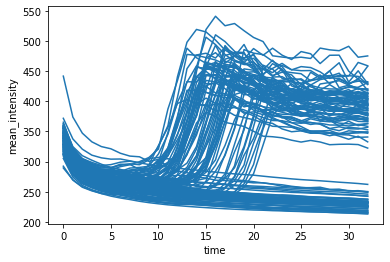

In [343]:
multiwell.plot_intensity_raw_line(f_gfp_table)

Text(0.5, 1.0, 'GFP CYPRO 4ngml')

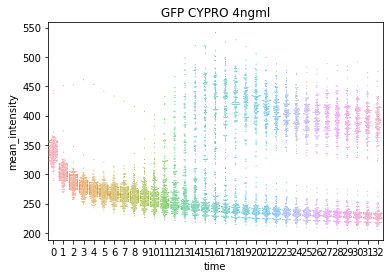

In [242]:
rfp_table = get_intensity_table(mask, RFP_stack)

In [303]:
pivot_rfp_grow = rfp_table_grow.pivot(index='time', columns='label', values='mean_intensity')
pivot_gfp_grow = gfp_table_grow.pivot(index='time', columns='label', values='mean_intensity')

pivot_rfp_grow

label,2,3,4,8,9,12,14,15,17,18,19,23,25,26,28,29,30,31,32,34,35,38,42,43,44,45,46,48,52,53,55,56,57,60,62,63,64,66,67,68,69,72,76,77,79,82,85,86,87,89,90,96,97,103,105,106,107,108,110,115,116,118,119,120,124,125,126,127,128,130,133,134,135,136,137,143,144,146,147,148,149,150,151,152,153,154,155,157,161,163,165,166,167,168,172,174,175,176,182,183,186,189,191,194,196,198,199,200,201,202,203,204,205,206,208,209,210,212,213,214,215,217
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,445.898965,478.718687,471.894207,457.721296,451.430929,441.905374,474.801288,448.755260,442.946522,438.934346,467.875275,442.152929,413.738614,452.256008,436.255359,445.302935,406.377296,454.921889,440.338872,478.232238,462.510680,487.197757,452.032533,491.380325,467.376402,464.409113,466.135872,464.618337,456.289982,470.864865,435.000863,470.876110,483.409045,498.672518,466.682793,496.591244,452.117964,482.405505,448.530241,503.293002,475.510381,490.480752,439.049638,462.121305,422.506253,439.084821,442.701493,447.749789,453.723567,439.413187,459.893196,502.488648,477.959020,480.587620,494.807377,507.600546,483.938037,462.859508,456.072634,464.460268,466.609949,467.594714,467.164110,459.413938,778.772187,499.672799,450.269082,497.959880,475.457238,486.908461,554.835214,471.090367,463.202959,441.518276,477.919243,459.432314,496.861629,490.765748,468.548708,464.555666,492.755654,454.932616,485.070534,489.209655,457.811670,499.276069,477.346172,1292.134847,503.051675,458.979094,419.895190,455.423152,440.913340,443.489491,441.456718,487.105691,453.365821,459.632952,463.004327,503.219888,491.721095,471.495425,482.682540,482.575574,490.244545,631.302035,3536.537527,430.445050,429.208955,400.386471,445.244170,424.701095,446.924707,440.704450,451.374010,438.891964,426.172983,427.306180,452.443418,425.746908,459.333030,498.903762
1,412.492854,442.243939,436.412091,425.735588,419.910420,411.582453,445.296996,417.513096,412.345652,413.884770,436.761569,415.299404,386.522772,420.078470,406.736719,413.431151,379.414979,424.801090,409.477044,444.112789,428.951345,458.853721,422.540541,454.830122,437.731838,435.653417,433.414198,433.477186,423.978471,438.785929,407.815789,440.460480,449.166332,468.830993,434.540150,464.794393,423.588350,451.663761,419.274670,468.132731,443.830450,457.001750,414.126680,434.678899,396.751376,413.365575,417.775693,422.266272,424.511677,411.619780,430.915159,470.871001,447.996002,447.752405,459.145902,479.786624,452.889643,442.482689,429.360614,434.759375,445.275686,444.454626,439.314737,432.114610,662.570448,468.477880,421.704348,470.048646,446.713330,457.543790,519.493980,450.000000,440.674064,418.127929,450.022150,433.523532,475.533857,463.924705,441.809642,435.988072,465.040806,426.716425,456.855684,462.173333,433.212524,469.503795,450.135035,1502.622799,475.186603,432.920358,396.578734,431.168774,421.393866,425.747781,414.139766,451.802439,434.601691,437.171625,436.983173,474.914099,463.934403,444.560384,455.828246,451.816606,467.942727,649.132285,2732.714534,412.450990,407.955224,380.245033,422.850480,405.028558,423.304779,417.895550,428.830461,417.254018,404.077575,407.011236,427.807390,403.148852,433.481802,728.497813
2,399.498768,428.304040,420.648866,411.003811,406.958510,398.984382,431.562661,403.802920,399.098261,400.629745,421.750551,403.713009,375.582673,408.115743,394.535881,400.120090,367.653792,411.308356,396.467425,426.923623,414.744858,445.649847,410.077077,440.130325,425.313018,422.525448,419.951575,419.365885,408.824692,425.285285,394.992235,428.773091,434.843719,453.076229,420.522195,453.415150,411.476260,437.770183,406.011824,452.190519,430.762976,440.890201,402.457084,423.382263,385.386693,402.641369,406.041791,409.748943,412.160510,398.472967,417.658053,456.703818,434.104948,433.533668,444.230328,465.989536,438.031660,432.466633,418.048593,421.920536,433.911204,432.587665,426.100883,419.657011,614.735590,453.962768,409.001932,457.82

In [319]:
[pivot_gfp_grow.values.shape, pivot_rfp_grow.values.shape]

[(33, 125), (33, 122)]

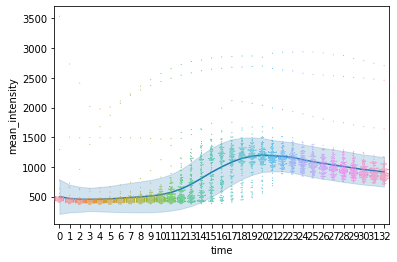

In [274]:
plot_intensity_vs_time(rfp_table_grow)
plot = plot_intensity_line(rfp_table_grow)

(300, 1600)

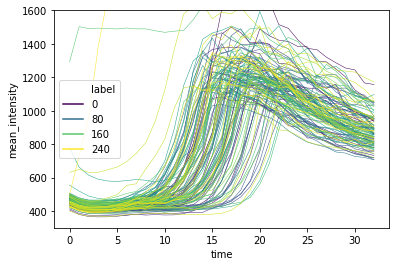

In [299]:
plot_intensity_raw_line(rfp_table_grow, lw=0.5, hue='label', palette="viridis")
plt.ylim(300,1600)

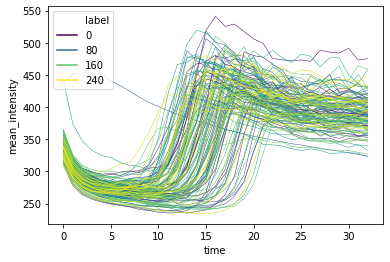

In [298]:
plot_intensity_raw_line(gfp_table_grow.sort_index(), lw=0.5, hue='label', palette="viridis")

<ipython-input-258-eef7cd595627>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return table[table[table.time == time].mean_intensity > min_intensity]


Text(0.5, 1.0, 'CYPRO 4ngml only grow')

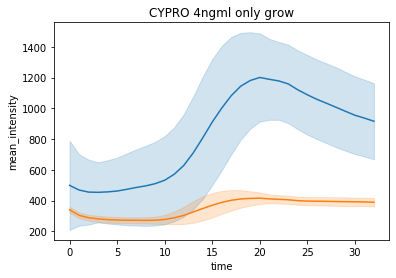

In [278]:
rfp_table_grow = filter_table_by_intensity(rfp_table, 32, 700)
gfp_table_grow = filter_table_by_intensity(gfp_table, 32, 300)

plot_intensity_line(rfp_table_grow)
plot_intensity_line(gfp_table_grow)
plt.title('CYPRO 4ngml only grow')

<ipython-input-265-561d483548e0>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return table[table[table.time == time].mean_intensity < max_intensity]


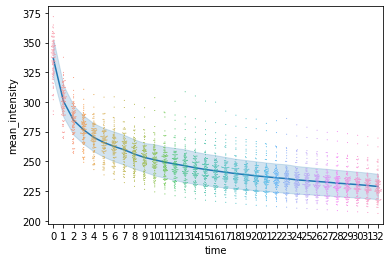

In [275]:
gfp_bg = filter_table_by_max_intensity(gfp_table, 32, 300)
plot_intensity_line(gfp_bg)
plot_intensity_vs_time(gfp_bg)

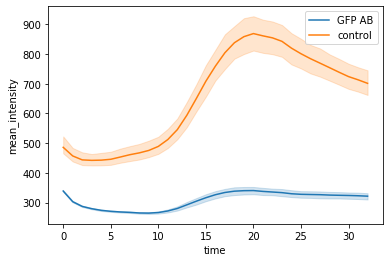

In [276]:
sns.lineplot(data=gfp_table, x='time', y='mean_intensity', label='GFP AB')
sns.lineplot(data=rfp_table, x='time', y='mean_intensity', label='control')


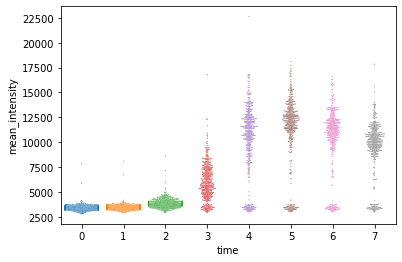

In [230]:
control_rfp_table = get_intensity_table(good_labels, control_RFP_stack[:8])

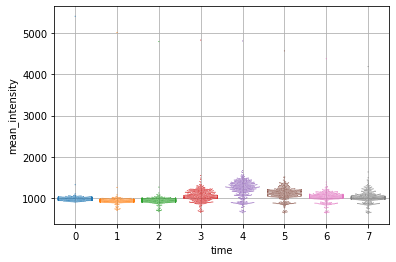

In [263]:
control_gfp_table = get_intensity_table(good_labels, control_GFP_stack[:8])
plt.grid()

In [237]:
control_gfp_table = control_gfp_table.query('mean_intensity< 2000')

Text(0.5, 1.0, 'control_RFP')

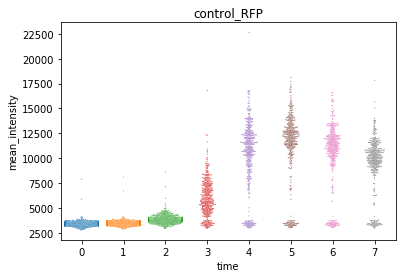

In [232]:
plot_intensity_vs_time(rfp_table)
plt.title('control_RFP')

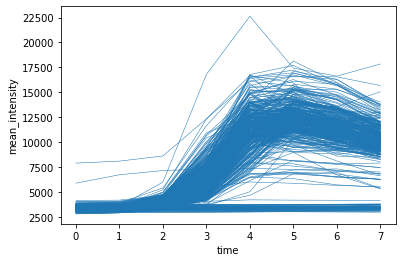

In [286]:
plot_intensity_raw_line(control_rfp_table, lw=0.5)

Text(0.5, 1.0, 'control_GFP')

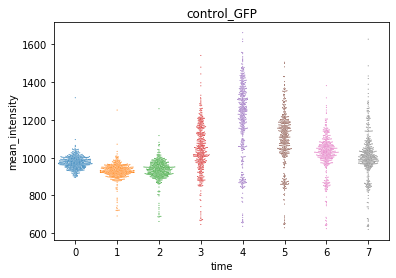

In [233]:
plot_intensity_vs_time(gfp_table)
plt.title('control_GFP')

<ipython-input-258-eef7cd595627>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return table[table[table.time == time].mean_intensity > min_intensity]


Text(0.5, 1.0, 'CYPRO 4ngml only grow')

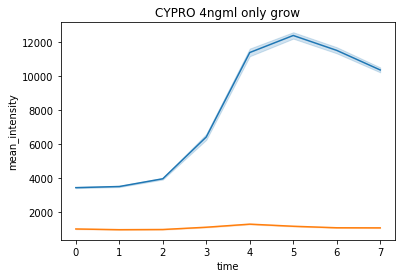

In [264]:
rfp_control_table_grow = filter_table_by_intensity(control_rfp_table, 7, 5000)
gfp_control_table_grow = filter_table_by_intensity(control_gfp_table, 7, 900)

plot_intensity_line(rfp_control_table_grow)
plot_intensity_line(gfp_control_table_grow)
plt.title('CYPRO 4ngml only grow')